In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# Making dataset

(427, 640)


-1

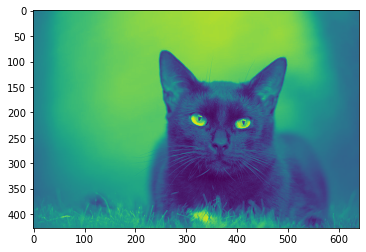

In [2]:
path=cv2.imread("dataset\\Cat\\1.jpg",cv2.IMREAD_GRAYSCALE)
#print(path)
plt.imshow(path)
print(path.shape)
cv2.waitKey(1000)


dataset
['Bag', 'Ball', 'Bed', 'Bench', 'Blackboard', 'Blanket', 'Boat', 'Book', 'Bottle', 'Bucket', 'Calculator', 'Camera', 'Cat', 'CeilingFan', 'Chairs', 'ClothesOnHanger', 'Computers', 'Cooler', 'CricketBat', 'Curtain', 'Curtains', 'Dog', 'Door', 'Duster', 'Fan', 'Flowers', 'Fruits', 'Gate', 'Glass', 'Human', 'Icard', 'Lamp', 'Laptop', 'Lunchbox', 'Mobile phone', 'Pen', 'Pillow', 'Podium', 'Refrigerator', 'Shoes', 'Sleeper', 'Specs', 'Stairs', 'Table', 'Telephone', 'Trophy', 'Tubelight', 'Washbasin', 'Water tap', 'WhiteBoard', 'Window']
dataset\Bag
dataset\Ball
dataset\Bed
dataset\Bench
dataset\Blackboard
dataset\Blanket
dataset\Boat
dataset\Book
dataset\Bottle
dataset\Bucket
dataset\Calculator
dataset\Camera
dataset\Cat
dataset\CeilingFan
dataset\Chairs
dataset\ClothesOnHanger
dataset\Computers
dataset\Cooler
dataset\CricketBat
dataset\Curtain
dataset\Curtains
dataset\Dog
dataset\Door
dataset\Duster
dataset\Fan
dataset\Flowers
dataset\Fruits
dataset\Gate
dataset\Glass
dataset\Human

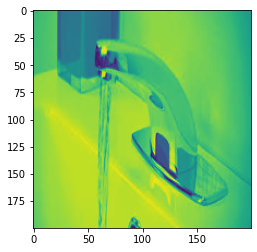

In [3]:
dataset_dir_path="dataset"
print(dataset_dir_path)

print(os.listdir(dataset_dir_path))
categories=os.listdir(dataset_dir_path)

img_array_list=[]
obj_category=[]
img_size=200

for category in categories:
    path=os.path.join(dataset_dir_path,category)
    class_num=categories.index(category)
    print(path)
    
    for img in os.listdir(path):
        try: 
            p=os.path.join(path,img) #making a path to the categories directories
            img_array=cv2.imread(p,cv2.IMREAD_GRAYSCALE)

            #Resizing the image
            img_array=cv2.resize(img_array,(img_size,img_size))

            plt.imshow(img_array)
            img_array_list.append(img_array)
            obj_category.append(category)
        except Exception as e:
            pass
        
print(img_array_list)

In [ ]:
plt.imshow(img_array_list[1])
cv2.waitKey(10000)

# Converting the images into the 2D ndarray from a list of ndarray

(200, 200)
<class 'list'>
413
(413, 200, 200)


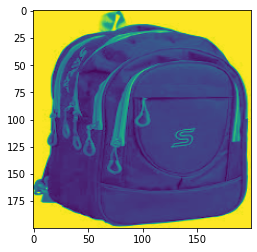

In [6]:
print(img_array_list[1].shape)
print(type(img_array_list))

#converting into 2D array
img_ndarray_2D=np.array(img_array_list)

print(len(img_array_list))
#print(img_ndarray.shape)
#print(img_ndarray[1].shape)
plt.imshow(img_ndarray_2D[0])
print(img_ndarray_2D.shape)

# Converting the 2D image array to 1D array for training purpose

In [5]:
l=[]
for i in img_ndarray_2D:
    l.append(i.reshape(-1))
img_ndarray_1D=np.array(l)
print(img_ndarray_1D.shape)
    

(413, 40000)


# Making a dict object from img list and category list:

In [7]:
info={"images":img_array_list,"category":obj_category}

# Making Dataframe from the above dict object

In [8]:
df=pd.DataFrame(info)
df

,images,category
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",Bag
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",Bag
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",Bag
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",Bag
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",Bag
...,...,...
408,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Water tap
409,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Water tap
410,"[[55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, ...",Water tap
411,"[[198, 197, 198, 202, 209, 217, 223, 216, 205,...",Water tap


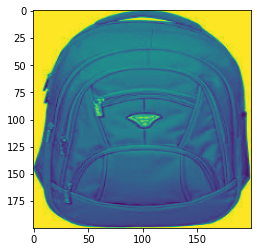

In [10]:
plt.imshow(df['images'][4])

In [ ]:
import cv2
import numpy as np

face_cascade = cv2.CascadeClassifier('C:/Users/DESKTOP/Pictures/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/DESKTOP/Pictures/haarcascade_eye.xml')
cap = cv2.VideoCapture(0)

while True:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y , w, h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y + h), (255,255,0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
    cv2.imshow('img', img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()